In [1]:
import PIL
from PIL import Image
import numpy as np

filepath = "IMG/ladybug.png"
image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

The Image is represented as 3D array (height, width, color channels (RGB)). The following code reshapes the array to get along list of RGB colors, then it clusters these colors using k-means with eight clusters. It creates a segmented_img array containing the nearest cluster center for each pixel., and lastly it reshapres the array to the original image shapes.

In [2]:
from sklearn.cluster import KMeans

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


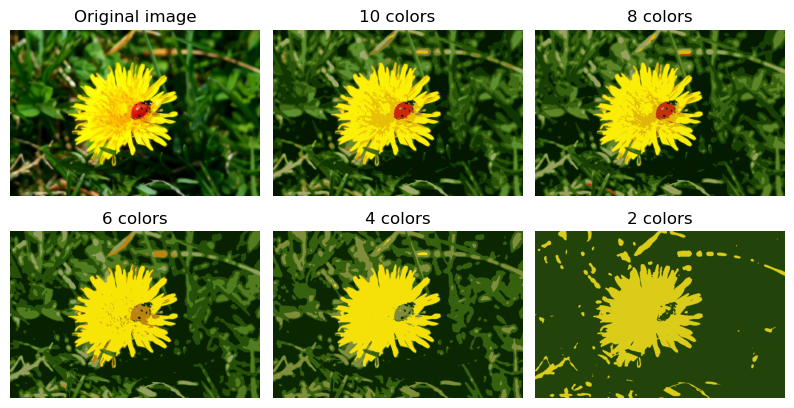

In [3]:
import matplotlib.pyplot as plt

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
n_clusters = 8
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()